# Suplari Data Exercise

This notebook answers the following four questions: 

1. What are the top 10 suppliers for 2017 and how much is spent on each supplier?

2. Which business unit was the top spender so far in 2017?

3. Compare the top 10 suppliers in 2017 to the top suppliers in 2016

4. How many transactions were recorded for 2015, 2016, and 2017 respectively?

To do so, I used the datasets located in the `\Data` folder.

### Import libraries

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load datasets

In [2]:
mapping_bu = pd.read_csv('Data/techtrades_bu.csv')
mapping_account = pd.read_csv('Data/techtrades_accounts.csv')
data2015 = pd.read_csv('Data/2015pcard_data.csv')
data2016 = pd.read_csv('Data/2016pcard_data.csv')
data2017 = pd.read_csv('Data/2017pcard_data.csv')

## 0. Data cleaning of the 2017 dataset

I'll begin by exploring and cleaning the 2017 dataset. For now, I'll assume it is similar to the 2015 and 2016 datasets (althought we'll check that assumption later). If they are, we could then replicate the same steps for the other datasets.

### Exploring the 2017 dataset columns

In [3]:
data2017.head(4)

,transactionid,amount,transactiondate,vendor,merchantcode,bu,account,ExpenseType,costcenter
0,17pcp8865,18.929075,7/10/2017,76,15100,100,8740,Building Suppliles,Corporate IT
1,17pcp17762,53.014500,6/11/2017,76,15100,100,8740,Building Suppliles,Corporate IT
2,17pcp154402,70.662625,7/29/2017,76,15100,100,8416,Car Rental,Corporate IT
3,17pcp155646,24.557775,5/27/2017,76,15100,100,8416,Car Rental,Corporate IT


In [4]:
data2017.vendor.unique()

array(['76', '01 BARTELL DRUGS', "025 IVAR'S SEATAC", ...,
       "LITTLE ANTHONY'S", "LONGO'S", 'UPEXPRESS.COM'], dtype=object)

In [5]:
with np.printoptions(threshold=np.inf):
    print(data2017.vendor.unique())

['76' '01 BARTELL DRUGS' "025 IVAR'S SEATAC" '1057 JESSIE'
 '32750 - BWI DAILY GARAGE' '3380 SLS LAS VEGAS' '443 N WABASH'
 '4TE*CULLIGAN OF ONTARIO' '51449 - 1616 SANSOM ST'
 '652 FLIGHT TERMINAL A' '7 ELEVEN STORE' '72711 - THE MAXWELL' '7-ELEVEN'
 '7TH AND PIKE GARAGE' '81411 - THE GROVE - SELF'
 '81577 - THE AMERICANA AT' '81787 - CALIFORNIA MART -'
 '82072 - 1600 SEVENTH AVE' '82636 - 100 N. LA CIENEGA'
 '85C BAKERY CAFE USA' '91 EXPRESS LANES REBILLS' '99 CENTS ONLY STORES'
 '99228 - 149 NEWBURY STREE' '99-CENTS-ONLY' 'A&W'
 'A-1 AIRLINE TAXI AND VAN' 'A4U' 'AA INFLIGHT VISA FACET'
 'AAROPORT LIMOUSINE SER' 'ABC COCINA' 'ABC DISPOSAL SYSTEMS INC'
 'ABC HAWAII' 'ABC KITCHEN' 'ABM ONSITE THE BLOC'
 'ABM ONSITE WESTFIELD MALL' 'ABM PARKING LIBERTY CENTE'
 'ABM PARKING SAN JOSE AIRP' 'ABM PARKING SHOPS AT MIDT'
 'ABSOLUT DIESEL REPAIR LL' 'ABSOPURE WATER COMPANY' 'AC MOORE STR'
 'ACCENTS' 'ACCESS' 'ACCESS INFO MGMT' 'ACE HOTEL DOWNTOWN LA'
 'ACE HOTEL DOWNTOWN LA F&B' 'ACE HOTEL NEW 

We have seven columns:
- `transactionid`: the id of the transaction.
- `amount`: the cost of the transaction.
- `transactiondate`: the date of the transaction.
- `vendor`: name of the vendor
- `merchantcode`: a code specific to each vendor. 
- `bu`: bussiness unit of the vendor that made the transaction.
- `account`: name of the vendor account (e.g., Professional Services, Advertisement).
- `ExpenseType`: the nature of the transaction.
- `costcenter`: cost center (a department within a company) of the vendor. 

In [6]:
data2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189858 entries, 0 to 189857
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   transactionid    189858 non-null  object 
 1   amount           189858 non-null  float64
 2   transactiondate  189858 non-null  object 
 3   vendor           189858 non-null  object 
 4   merchantcode     189858 non-null  int64  
 5   bu               189858 non-null  int64  
 6   account          189858 non-null  int64  
 7   ExpenseType      189858 non-null  object 
 8   costcenter       189858 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 13.0+ MB


- `transactiondate` is saved as an object. If needed, we could transform it later to a datetime object.
- Also, `merchantcode`, `bu`, and `account` are stored as an `int64` but they should be objects. We have mappings for the last two, so let's use their text names.
- Finally, `costcenter` also has a mapping, but it's almost identical to the values we currently have. 


In [7]:
# Change type of merchant code
data2017.merchantcode = data2017.merchantcode.astype('object')

In [8]:
mapping_bu.head()

,buid,name
0,100,"Techtrades, Inc. (HQ)"
1,110,Techtrades LTD (UK)
2,120,Techtrades NK (Japan)
3,200,"Zeus Banking, Inc."


In [9]:
#Mapping bu
mapping_bu_dict = mapping_bu.set_index('buid')['name'].to_dict()
data2017.bu = data2017.bu.map(mapping_bu_dict, na_action='ignore')

In [10]:
len(mapping_account)

41

In [11]:
mapping_account.head()

,accountcode,accountname
0,1250,Employee Receivables
1,1500,Other Current Assets
2,1540,Prepaid Vendor Amounts
3,1590,Other Prepaid Expenses
4,6150,Freight Cost


In [12]:
mapping_account.tail()

,accountcode,accountname
36,8645,IT Maintenance
37,8650,Equipment Mantenance and Repair
38,8720,Building Maintenance
39,8730,Property Taxes
40,8740,Building Suppliles


In [13]:
#Mapping account
mapping_account_dict = mapping_account.set_index('accountcode')['accountname'].to_dict()
data2017.account = data2017.account.map(mapping_account_dict, na_action='ignore')

In [14]:
# Check dataset again
data2017.head(4)

,transactionid,amount,transactiondate,vendor,merchantcode,bu,account,ExpenseType,costcenter
0,17pcp8865,18.929075,7/10/2017,76,15100,"Techtrades, Inc. (HQ)",Building Suppliles,Building Suppliles,Corporate IT
1,17pcp17762,53.014500,6/11/2017,76,15100,"Techtrades, Inc. (HQ)",Building Suppliles,Building Suppliles,Corporate IT
2,17pcp154402,70.662625,7/29/2017,76,15100,"Techtrades, Inc. (HQ)",Car Rental,Car Rental,Corporate IT
3,17pcp155646,24.557775,5/27/2017,76,15100,"Techtrades, Inc. (HQ)",Car Rental,Car Rental,Corporate IT


In [15]:
data2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189858 entries, 0 to 189857
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   transactionid    189858 non-null  object 
 1   amount           189858 non-null  float64
 2   transactiondate  189858 non-null  object 
 3   vendor           189858 non-null  object 
 4   merchantcode     189858 non-null  object 
 5   bu               189858 non-null  object 
 6   account          189858 non-null  object 
 7   ExpenseType      189858 non-null  object 
 8   costcenter       189858 non-null  object 
dtypes: float64(1), object(8)
memory usage: 13.0+ MB


### Exploring null values

In [16]:
data2017.isnull().sum()

transactionid      0
amount             0
transactiondate    0
vendor             0
merchantcode       0
bu                 0
account            0
ExpenseType        0
costcenter         0
dtype: int64

No missing values! Great!

### Checking for duplicate ids

In [17]:
data2017.transactionid.duplicated().sum() # The result of the duplicated() is a boolean Series, and we can add them up to count the number of duplicates. Behind the theme, True get converted to 1 and False get converted to 0, then it adds them up.

0

No duplicate ids. Cool.

### Checking the amount column

In [18]:
data2017.amount.describe()

count    189858.000000
mean        254.479514
std        4622.354189
min      -20147.987750
25%           8.281412
50%          28.325357
75%         107.984436
max      765407.166000
Name: amount, dtype: float64

We seem to have positive and negative values. The positive values probably refer to a payment made to the supplier. In contrast, negative values could mean a couple of things. As specified by personal correspondence with Suplari, it could mean that 
- the transaction got cancelled,
- the transaction was done using credit card (although I'm still confused as to why is appears as a negative number), or
- there was an internal consolidation in total amounts. 

Considering these three scenarios, it seems safe to assume that negative numbers represent a positive balance for Tech Trades. Just for the sake of comprehensiveness, let's explore positive and negative numbers separately.

In [19]:
data2017_positives = data2017.loc[data2017.amount >= 0]
data2017_negatives = data2017.loc[data2017.amount < 0]

In [20]:
print('Positives: ', len(data2017_positives))
print('Negatives: ', len(data2017_negatives))

Positives:  187370
Negatives:  2488


#### Exploring positive values

In [21]:
data2017_positives.describe()

,amount
count,187370.000000
mean,260.834519
std,4651.473131
min,0.001870
25%,8.796129
50%,29.370687
75%,110.103262
max,765407.166000


It seems that we have one or more clear outliers, since the highest values is many standard deviations from the mean. Also, the mean is higher than 75% of our values. 

In [22]:
percentiles = list(range(10, 100, 5))
for percentile in percentiles:
    print(f'Percentile {percentile}:', data2017_positives.amount.quantile(percentile/100))

Percentile 10: 3.19022
Percentile 15: 4.6937
Percentile 20: 6.522373000000003
Percentile 25: 8.796129375
Percentile 30: 11.45375
Percentile 35: 14.57478
Percentile 40: 18.472795
Percentile 45: 23.258125
Percentile 50: 29.3706875
Percentile 55: 37.32982825000001
Percentile 60: 48.3111695
Percentile 65: 62.39801975
Percentile 70: 81.8125
Percentile 75: 110.1032625
Percentile 80: 151.2395225000002
Percentile 85: 222.0625
Percentile 90: 356.84322685000006
Percentile 95: 684.7170962499999


Yes, there are several outliers that are skewing the distribution, since the 95th percentile is less than 700. 

In [91]:
sns.set_theme()

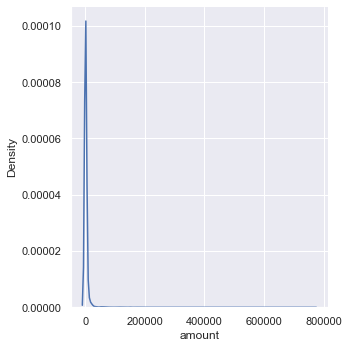

In [24]:
sns.displot(round(data2017_positives.loc[data2017_positives.amount > 700, 'amount']), kind="kde");

There are so few values with high amounts that they do not even appear in this graph. Let's try with another one that uses values higher than 20,000.

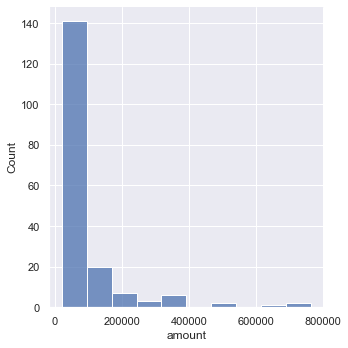

In [25]:
sns.displot(round(data2017_positives.loc[data2017_positives.amount > 20_000, 'amount']), bins=10);

Our graph confirms that there are very few rows (less than 10) with a very high amount value. 

In [26]:
data2017_positives.sort_values(by='amount', ascending=False).head(10)

,transactionid,amount,transactiondate,vendor,merchantcode,bu,account,ExpenseType,costcenter
21317,17pcp69068,765407.1660,3/15/2017,"Oracle, Inc.",52477,"Techtrades, Inc. (HQ)",IT Software,IT Software,Corporate IT
135621,17pcp69069,764172.0400,6/15/2017,"Oracle, Inc.",52477,"Techtrades, Inc. (HQ)",IT Software,IT Software,Operations
36754,17pcp161925,682886.3522,7/30/2017,"Apple, Inc.",17958,Techtrades LTD (UK),IT Hardware Servers,Prepaid Vendor Amounts,Executive
180566,17pcp46257,519933.0235,4/23/2017,Microsoft Corporation,26078,Techtrades NK (Japan),Freight Cost,Freight Cost,Sales
113146,17pcp161924,511700.1956,7/30/2017,"Apple, Inc.",17958,Techtrades LTD (UK),IT Hardware Servers,Prepaid Vendor Amounts,Operations
127450,17pcp25437,369657.7500,4/4/2017,IBM,36335,"Techtrades, Inc. (HQ)",IT Software,IT Software,Operations
59194,17pcp93186,358907.4974,5/23/2017,Spiceworks,44293,Techtrades LTD (UK),Telecommunications - Voice,Telecommunications - Voice,Facilities
11195,17pcp93175,344851.9986,7/25/2017,Ernst & Young,44293,Techtrades LTD (UK),Telecommunications - Voice,Telecommunications - Voice,Corporate IT
131032,17pcp46261,343553.4127,6/24/2017,Microsoft Corporation,26078,Techtrades NK (Japan),Freight Cost,Freight Cost,Operations
162629,17pcp46258,329959.1158,5/2/2017,Microsoft Corporation,26078,Techtrades NK (Japan),Freight Cost,Freight Cost,Product


These are some of the rows that seem to be skewing the distributions. They will probably have a big influence in the answer we give to the question of this section. 

#### Exploring negative values

In [27]:
data2017_negatives.describe()

,amount
count,2488.000000
mean,-224.112625
std,893.094370
min,-20147.987750
25%,-144.379194
50%,-37.585317
75%,-9.846251
max,-0.000935


Just as before, we seem to have a couple of outliers, since the mean is higher (or, in this case with negative values, lower) than the mean.

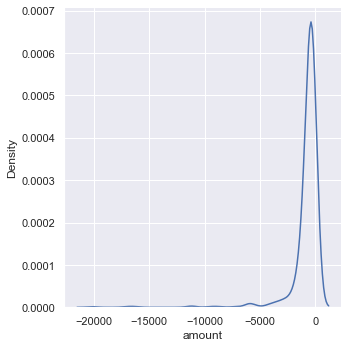

In [28]:
sns.displot(round(data2017_negatives.loc[data2017_negatives.amount < -145, 'amount']), kind="kde");

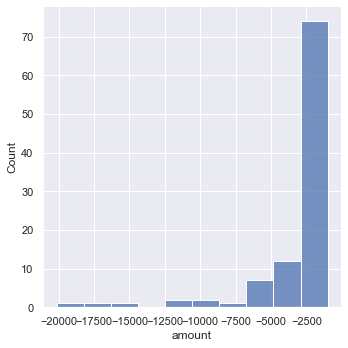

In [29]:
sns.displot(round(data2017_negatives.loc[data2017_negatives.amount < -1000, 'amount']), bins=10);

Yes, again we seem to have some values that skew the distribution. 

In [30]:
data2017_negatives.sort_values(by='amount', ascending=True).head(10)

,transactionid,amount,transactiondate,vendor,merchantcode,bu,account,ExpenseType,costcenter
175283,17pcp71390,-20147.987750,2/2/2017,CENTURYLINK,23865,"Techtrades, Inc. (HQ)",IT Hardware Servers,Airfare,Sales
74702,17pcp71001,-16954.729000,7/7/2017,CENTURYLINK,23865,Techtrades LTD (UK),IT Hardware Servers,Airfare,Human Resources
118171,17pcp71262,-16299.681090,1/28/2017,CENTURYLINK,23865,"Techtrades, Inc. (HQ)",IT Hardware Servers,Airfare,Operations
16424,17pcp35001,-11220.000000,7/15/2017,LEE HECHT HARRISON,32974,Techtrades LTD (UK),Professional Services,Professional Services,Corporate IT
82995,17pcp166599,-11135.322660,7/11/2017,British Airways,19825,"Techtrades, Inc. (HQ)",IT Hardware Servers,Airfare,Legal
175257,17pcp69961,-9410.652515,2/25/2017,CENTURYLINK,23865,"Zeus Banking, Inc.",IT Hardware Servers,Airfare,Sales
4154,17pcp166614,-8730.225900,4/10/2017,British Airways,19825,"Techtrades, Inc. (HQ)",IT Hardware Servers,Airfare,Corporate IT
185710,17pcp150873,-7193.212125,6/18/2017,STARBUCKS COLORADO,54423,Techtrades LTD (UK),Office Supplies,Office Supplies,Sales
40288,17pcp39930,-6019.018088,2/2/2017,MALLORY PAINT STORE IN,34056,"Techtrades, Inc. (HQ)",Outside Services,Prepaid Vendor Amounts,Executive
68543,17pcp159131,-6009.053325,5/26/2017,NIM*nextissue.com,17022,Techtrades LTD (UK),IT Hardware Servers,Airfare,Finance


There are big reimbursements made by the company CENTURYLINK.

### Cleaning the vendor column

We should also check whether we have duplicate values in the vendor column. This is necessary because a vendor's name could be listed, for example, in lowercase and in uppercase.

In [31]:
# Apply uppercase and remove whitespaces or special characters
data2017.vendor = data2017.vendor.str.upper().str.strip()

In [32]:
for x in range(0, 10):
    print(x)

0
1
2
3
4
5
6
7
8
9


Now let's write some code to detect those vendors whose name's begin with the same 4 characters. This should allow us to compare the names and see whether they refer to the same one.

In [33]:
# Create copy of dataset to test code below
data_test = data2017[:5_000].copy()
data_test.shape

(5000, 9)

**¡Warning! The following function takes a long time to execute. To illustrate what it does, I only used 5,000 rows of the original dataset.**

In [34]:
### Detect vendors begining with the same characters

num_characters = 4
print(f'----Vendors with same initial {num_characters} characters:----')

# Select a value in a row
already_checked = []
for i in range(len(data_test)):
    original_value = data_test.loc[i, 'vendor']
    
    # Check if the value has already been compared with other rows
    if original_value in already_checked:
        pass
    
    # If not, select another value for comparison
    else:
        already_checked.append(original_value)
        comparison_already_checked = []
        for x in range(i + 1, len(data_test)):
            comparison_value = data_test.loc[x, 'vendor']
            
            # Check if the comparison value has already been used
            if comparison_value in comparison_already_checked:
                pass
            
            else:
                comparison_already_checked.append(comparison_value)
                
                if (original_value != comparison_value) & (original_value[:num_characters] == comparison_value[:num_characters]):
                    print(f'{original_value} | {comparison_value}')

----Vendors with same initial 4 characters:----
ABC COCINA | ABC DISPOSAL SYSTEMS INC
ABC COCINA | ABC HAWAII
ABC COCINA | ABC KITCHEN
ABC DISPOSAL SYSTEMS INC | ABC HAWAII
ABC DISPOSAL SYSTEMS INC | ABC KITCHEN
ABC HAWAII | ABC KITCHEN
ABM ONSITE THE BLOC | ABM ONSITE WESTFIELD MALL
ABM ONSITE THE BLOC | ABM PARKING LIBERTY CENTE
ABM ONSITE THE BLOC | ABM PARKING SAN JOSE AIRP
ABM ONSITE THE BLOC | ABM PARKING SHOPS AT MIDT
ABM ONSITE WESTFIELD MALL | ABM PARKING LIBERTY CENTE
ABM ONSITE WESTFIELD MALL | ABM PARKING SAN JOSE AIRP
ABM ONSITE WESTFIELD MALL | ABM PARKING SHOPS AT MIDT
ABM PARKING LIBERTY CENTE | ABM PARKING SAN JOSE AIRP
ABM PARKING LIBERTY CENTE | ABM PARKING SHOPS AT MIDT
ABM PARKING SAN JOSE AIRP | ABM PARKING SHOPS AT MIDT
ABSOLUT DIESEL REPAIR LL | ABSOPURE WATER COMPANY
ACCENTS | ACCESS
ACCENTS | ACCESS INFO MGMT
ACCESS | ACCESS INFO MGMT
ACE HOTEL DOWNTOWN LA | ACE HOTEL DOWNTOWN LA F&B
ACE HOTEL DOWNTOWN LA | ACE HOTEL NEW YORK
ACE HOTEL DOWNTOWN LA | ACE LOT 01

There are multiple vendors whose names appear written in different ways. In some cases, I'm unsure as to whether the suppliers are different, especially those that are in different locations. For example, are 'WESTIN NY AT TIMES SQUARE' and 'WESTIN NY AT TS DINING' different suppliers? For the sake of simplicity, I will assume that they are.

By scrolling through the list, let's proceed to correct the cases that are more straight-forward:

In [35]:
mapping_duplicate_initials = {
    "ADVANCED BUSINESS G": 'ADVANCED BUSINESS GRAPHI',
    "BURGER KING N": "BURGER KING",
    "C2 IMAGING LLC": "C2 IMAGING",
    "CARIBOU COFFEE CO": "CARIBOU COFFEE",
    "COFFEE BEAN&TEA LEA": "COFFEE BEAN & TEA LEAF",
    "COSTCO *DELIVERY": "COSTCO DELIVERY",
    "CULLIGAN 561-966-9333": "CULLIGAN",
    "D J*WALL-ST-JOURNAL": "D J*WALL ST JOURNAL",
    "DOLLARTREE": "DOLLAR TREE",
    "DOMINO'S": "DOMINO'S PIZZA",
    "DOMINOS": "DOMINO'S PIZZA",
    "FASTSIGNS": "FAST SIGNS",
    "FEDEXOFFICE": "FEDEX OFFICE",
    "FERGUSON ENT": "FERGUSON ENTERPRISES",
    "FRED-MEYER": "FRED MEYER",
    "HARRIED AND HUNGRY": "HARRIED & HUNGRY",
    "HUDSONNEWS ST": "HUDSON NEWS ST",
    "KRISPY KREME DOUGH": "KRISPY KREME",
    "MACY*S EAST": "MACY'S EAST",
    "MEIJER INC Q": "MEIJER Q",
    "OFFICEMAX/OFFICEDEPOT": "OFFICEMAX/OFFICE DEPOT",
    "OFFICEMAX/OFFICEDEPT": "OFFICEMAX/OFFICE DEPOT",
}

In [36]:
data_test.vendor = data_test.vendor.replace(mapping_duplicate_initials)

In [37]:
data_test.head()

,transactionid,amount,transactiondate,vendor,merchantcode,bu,account,ExpenseType,costcenter
0,17pcp8865,18.929075,7/10/2017,76,15100,"Techtrades, Inc. (HQ)",Building Suppliles,Building Suppliles,Corporate IT
1,17pcp17762,53.014500,6/11/2017,76,15100,"Techtrades, Inc. (HQ)",Building Suppliles,Building Suppliles,Corporate IT
2,17pcp154402,70.662625,7/29/2017,76,15100,"Techtrades, Inc. (HQ)",Car Rental,Car Rental,Corporate IT
3,17pcp155646,24.557775,5/27/2017,76,15100,"Techtrades, Inc. (HQ)",Car Rental,Car Rental,Corporate IT
4,17pcp146243,46.717275,3/21/2017,76,15100,"Zeus Banking, Inc.",Car Rental,Car Rental,Corporate IT


In [38]:
# Replace values in original dataset
data2017.vendor = data2017.vendor.replace(mapping_duplicate_initials)

## 1. What are the top 10 suppliers for 2017 and how much is spent on each supplier?

In [83]:
top_10_2017 = data2017.groupby('vendor')['amount'].sum().sort_values(ascending=False).round().head(10)
top_10_2017 = top_10_2017.reset_index()
top_10_2017

,vendor,amount
0,IBM,4559476.0
1,CDW DIRECT,3453158.0
2,"APPLE, INC.",2408586.0
3,CENTURYLINK,2243072.0
4,MICROSOFT CORPORATION,2178931.0
5,"SMART IMS, INC",1729185.0
6,AMAZON AWS,1668552.0
7,"ORACLE, INC.",1529637.0
8,"DATAART SOLUTIONS, INC",1270112.0
9,"SALESFORCE.COM, INC.",1240089.0


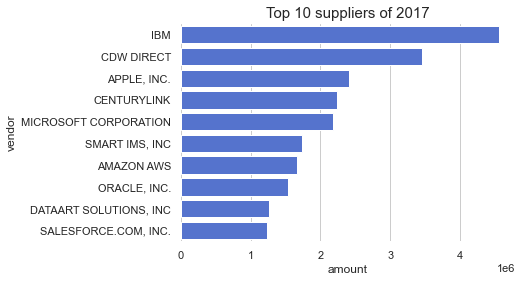

In [132]:
sns.set_style("whitegrid")
sns.barplot(data=top_10_2017, x='amount', y='vendor', color='royalblue').set_title('Top 10 suppliers of 2017', fontsize=15)
sns.despine(bottom=True, left=True)
plt.savefig('Graphs/top_10_suppliers_2017', dpi=300 ,bbox_inches="tight");

## 2. Which business unit was the top spender so far in 2017?

In [123]:
top_bu_2017 = data2017.groupby('bu')['amount'].sum().sort_values(ascending=False).round(2).reset_index()
top_bu_2017

,bu,amount
0,"Techtrades, Inc. (HQ)",32556508.48
1,Techtrades LTD (UK),13484202.55
2,"Zeus Banking, Inc.",1431102.21
3,Techtrades NK (Japan),843158.32


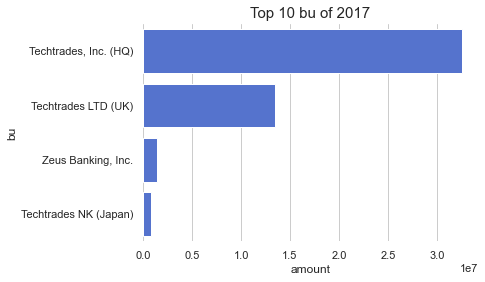

In [131]:
sns.set_style("whitegrid")
sns.barplot(data=top_bu_2017, x='amount', y='bu', color='royalblue').set_title('Top 10 bu of 2017', fontsize=15)
sns.despine(bottom=True, left=True)
plt.savefig('Graphs/top_10_bu_2017', dpi=300 ,bbox_inches="tight");

## 3. Compare the top 10 suppliers in 2017 to the top suppliers in 2016.

### Cleaning the 2016 dataset

In [41]:
data2016.head(4)

,transactionid,amount,transactiondate,vendor,merchantcode,bu,account,ExpenseType,costcenter
0,16pcc115,68.833,6/26/2016,76,15100,100,8740,Building Suppliles,Corporate IT
1,16pcc128,22.950,5/28/2016,76,15100,100,8740,Building Suppliles,Corporate IT
2,16pcc132,46.529,9/12/2016,76,15100,100,8740,Building Suppliles,Corporate IT
3,16pcc133,6.664,9/12/2016,76,15100,100,8740,Building Suppliles,Corporate IT


In [42]:
# Change type of merchant code
data2017.merchantcode = data2016.merchantcode.astype('object')

#Mapping bu
mapping_bu_dict = mapping_bu.set_index('buid')['name'].to_dict()
data2017.bu = data2016.bu.map(mapping_bu_dict, na_action='ignore')

#Mapping account
mapping_account_dict = mapping_account.set_index('accountcode')['accountname'].to_dict()
data2016.account = data2016.account.map(mapping_account_dict, na_action='ignore')

In [54]:
# Check for null values
data2016.isnull().sum()

transactionid      0
amount             0
transactiondate    0
vendor             0
merchantcode       0
bu                 0
account            0
ExpenseType        0
costcenter         0
dtype: int64

In [55]:
# Check for duplicate values
data2016.transactionid.duplicated().sum()

0

In [45]:
# Checking the values in the amount columns
data2016.amount.describe()

count    348170.000000
mean        224.670700
std        3795.569057
min      -17000.000000
25%          11.985000
50%          35.946500
75%         127.699750
max      733594.000000
Name: amount, dtype: float64

In [46]:
data2016.sort_values(by='amount', ascending=False).head(10)

,transactionid,amount,transactiondate,vendor,merchantcode,bu,account,ExpenseType,costcenter
199113,16pcc210390,733594.0000,9/1/2016,"Oracle, Inc.",52477,100,IT Software,IT Software,Operations
199112,16pcc210389,733594.0000,6/1/2016,"Oracle, Inc.",52477,100,IT Software,IT Software,Operations
199107,16pcc210388,733594.0000,3/1/2016,"Oracle, Inc.",52477,100,IT Software,IT Software,Corporate IT
199110,16pcc210391,733594.0000,12/1/2016,"Oracle, Inc.",52477,100,IT Software,IT Software,Marketing
31569,16pcc53167,509379.5765,7/16/2016,"Apple, Inc.",17958,110,Telecommunications - Voice,Prepaid Vendor Amounts,Marketing
31577,16pcc53170,424993.6845,7/16/2016,"Apple, Inc.",17958,110,Telecommunications - Voice,Prepaid Vendor Amounts,Operations
31560,16pcc53159,416394.0645,9/5/2016,"Apple, Inc.",17958,110,Telecommunications - Voice,Telecommunications - Voice,Corporate IT
31576,16pcc53168,404506.0835,7/16/2016,"Apple, Inc.",17958,110,Telecommunications - Voice,Prepaid Vendor Amounts,Operations
257557,16pcc256804,318164.0000,1/12/2017,STAPLES,47571,200,Office Supplies,Office Supplies,Product
134332,16pcc348243,313003.2300,9/6/2016,IBM,52410,100,IT Hardware Servers,IT Hardware Servers,Corporate IT


In [47]:
data2016.sort_values(by='amount', ascending=False).tail(10)

,transactionid,amount,transactiondate,vendor,merchantcode,bu,account,ExpenseType,costcenter
203452,16pcc213117,-7056.1390,1/14/2017,"Oxford Health Insurance, Inc",23865,100,Employee Incentives,Airfare,Operations
164007,16pcc47724,-7283.7010,5/12/2016,Microsoft Corporation,17022,110,IT Hardware Servers,Airfare,Finance
157385,16pcc163867,-7295.7795,1/19/2017,MALLORY PAINT STORE IN,34056,100,Outside Services,Prepaid Vendor Amounts,Executive
204984,16pcc213583,-7326.5410,1/19/2017,"Oxford Health Insurance, Inc",23865,100,Employee Incentives,Airfare,Sales
204811,16pcc211680,-7439.2510,2/12/2016,"Oxford Health Insurance, Inc",23865,200,Employee Incentives,Airfare,Sales
223913,16pcc346059,-7587.0235,11/1/2016,SAFEWAY STORE,54423,100,IT Hardware Other,IT Hardware Other,Human Resources
339023,16pcc336899,-9221.6840,9/30/2016,WAWAK,52966,100,Other General Expenses,Other General Expenses,Product
338981,16pcc336911,-9614.4690,7/3/2016,WAWAK,52966,100,Other General Expenses,Other General Expenses,Marketing
234409,16pcc118567,-13386.0465,3/18/2016,SAP,17824,110,Web Advertising,Telecommunications - Voice,Sales
149867,16pcc156247,-17000.0000,7/1/2016,LEE HECHT HARRISON,32974,110,Professional Services,Professional Services,Corporate IT


In [50]:
## Clean vendor column

# Apply uppercase and remove whitespaces or special characters
data2016.vendor = data2016.vendor.str.upper().str.strip()

# Replace duplicate vendor names
data2016.vendor = data2016.vendor.replace(mapping_duplicate_initials)

### Analysis of the top 10 suppliers of 2017

In [65]:
data2017.groupby('vendor')['amount'].sum().sort_values(ascending=False).round(3).head(10)

vendor
IBM                       4559476.000
CDW DIRECT                3453158.088
APPLE, INC.               2408585.512
CENTURYLINK               2243072.224
MICROSOFT CORPORATION     2178931.108
SMART IMS, INC            1729184.701
AMAZON AWS                1668552.296
ORACLE, INC.              1529637.475
DATAART SOLUTIONS, INC    1270111.870
SALESFORCE.COM, INC.      1240089.362
Name: amount, dtype: float64

### Analysis of the top 10 suppliers of 2016

In [53]:
data2016.groupby('vendor')['amount'].sum().sort_values(ascending=False).round(3).head(10)

vendor
IBM                             6773290.853
CDW DIRECT                      5818677.671
ORACLE, INC.                    3892199.000
SALESFORCE.COM, INC.            3884109.087
DATAART SOLUTIONS, INC          2673467.572
APPLE, INC.                     2611532.342
SMART IMS, INC                  2374319.858
AMAZON AWS                      2232726.999
OXFORD HEALTH INSURANCE, INC    2049243.619
OFFICE DEPOT                    1884776.449
Name: amount, dtype: float64

## 4. How many transactions were recorded for 2015, 2016, and 2017 respectively?

### Checking the 2015 dataset

In [59]:
# Check for duplicate values
data2015.transactionid.duplicated().sum()

0

In [57]:
# Check for null values
data2015.isnull().sum()

transactionid      0
amount             0
transactiondate    0
vendor             3
merchantcode       0
bu                 0
account            0
expensetype        0
costcenter         0
dtype: int64

In [61]:
print(f'2015: {len(data2015)}')
print(f'2016: {len(data2016)}')
print(f'2017: {len(data2017)}')

2015: 425318
2016: 348170
2017: 189858
